In [71]:
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [48]:
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'/home/saeid/.keras/datasets/auto-mpg.data'

In [50]:
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [51]:
dataset = dataset.dropna()

In [52]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [53]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)

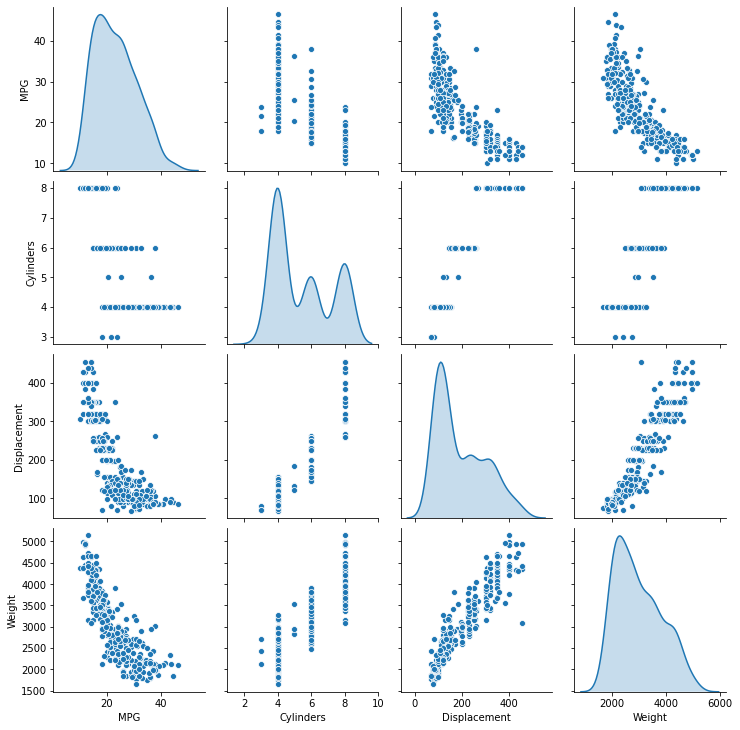

In [54]:
sns.pairplot(train_dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [55]:
train_stats = train_dataset.describe()
train_stats.pop('MPG')
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,314.0,5.477707,1.699788,3.0,4.00,4.0,8.00,8.0
Displacement,314.0,195.318471,104.331589,68.0,105.50,151.0,265.75,455.0
Horsepower,314.0,104.869427,38.096214,46.0,76.25,94.5,128.00,225.0
Weight,314.0,2990.251592,843.898596,1649.0,2256.50,2822.5,3608.00,5140.0
Acceleration,314.0,15.559236,2.789230,8.0,13.80,15.5,17.20,24.8
Model Year,314.0,75.898089,3.675642,70.0,73.00,76.0,79.00,82.0


In [56]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

In [62]:
def norm(x):
  return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

In [63]:
def build_model():
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [64]:
model = build_model()

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                448       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,673
Trainable params: 4,673
Non-trainable params: 0
_________________________________________________________________


In [67]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2, verbose=1)

Epoch 1/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.1135 - mae: 1.1487 - mse: 3.1100 - val_loss: 9.8162 - val_mae: 2.4242 - val_mse: 9.7948
Epoch 2/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.9112 - mae: 1.1215 - mse: 2.9342 - val_loss: 10.1016 - val_mae: 2.4064 - val_mse: 10.0818
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.8298 - mae: 1.1401 - mse: 2.8639 - val_loss: 10.2275 - val_mae: 2.4609 - val_mse: 10.2027
Epoch 4/1000
8/8 [==============================] - 0s 5ms/step - loss: 3.0224 - mae: 1.1634 - mse: 3.0413 - val_loss: 10.0137 - val_mae: 2.3429 - val_mse: 9.9965
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.9642 - mae: 1.1544 - mse: 2.9646 - val_loss: 9.8095 - val_mae: 2.4171 - val_mse: 9.7806
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.9399 - mae: 1.1291 - mse: 2.9645 - val_loss: 10.1540 - val_mae: 2.4997 - val_mse: 10.1272
Epoch 7/1000
8/8 [===

In [68]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,1.567101,0.759474,1.574819,10.893732,2.471317,10.867967,995
996,1.562728,0.779694,1.584932,11.134222,2.539778,11.103108,996
997,1.783827,0.862444,1.768456,11.114972,2.618690,11.073940,997
998,1.603344,0.818678,1.600221,10.744034,2.457373,10.714040,998
999,1.498784,0.733128,1.497624,10.784811,2.427236,10.756160,999


In [72]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'MAE [MPG]')

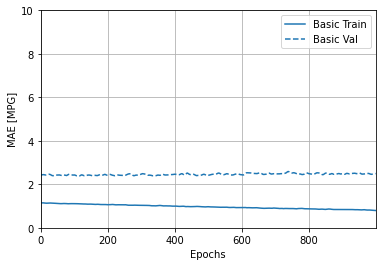

In [73]:
plotter.plot({'Basic': history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

Text(0, 0.5, 'MSE [MPG^2]')

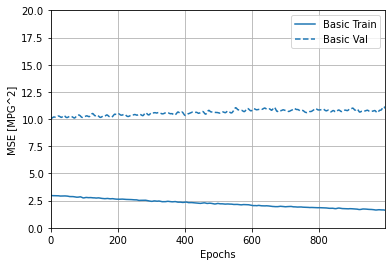

In [74]:
plotter.plot({'Basic': history}, metric = "mse")
plt.ylim([0, 20])
plt.ylabel('MSE [MPG^2]')

In [75]:
plotter.plot({'Early Stopping': early_history}, metric = "mae")
plt.ylim([0, 10])
plt.ylabel('MAE [MPG]')

NameError: name 'early_history' is not defined

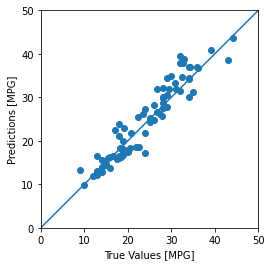

In [69]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


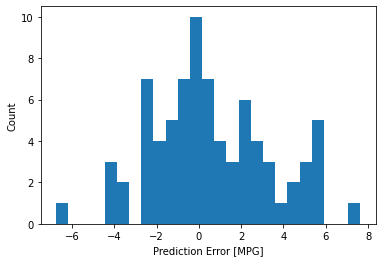

In [70]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [MPG]")
_ = plt.ylabel("Count")